In [2]:
import pandas as pd
import numpy as np

# Classification model evaluation metrics

## Accuracy

In [4]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

## AUC/ROC curve
*Area under the receiver operating characteristic curve*

ROC curve are a comparison of a model's true positive rate (tpr) VS a model's false positive rate (fpr)
+ True positive = model predicts `1` when truth is `1`
+ False positive = model predicts `1` when truth is `0`
+ True negative = model predicts `0` when truth is  `0`
+ False negative = model predicts `0` when truth is `1`

In [9]:
# Create train test set...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [11]:
y_probs_positive = y_probs[:, 1] #we only want the second column so we slice it
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [14]:
# Calculate fpt, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [16]:
type(fpr)

numpy.ndarray

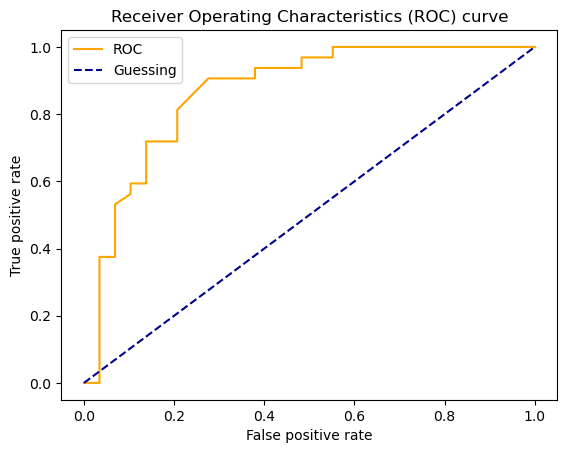

In [18]:
# We need to plot fpr to see in a way we can understand the data
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.

    Args:
        fpr (ndarray): False positive rate
        tpr (ndarray): True positive rate
    """
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

##  Confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [19]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [20]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual labels"],
    colnames=["Predicted labels"]
)

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [24]:
import sys
%conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /home/lima/Documents/AI/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.1             |  py310h06a4308_0         477 KB
    ------------------------------------------------------------
                                           Total:         477 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/linux-64::seaborn-0.12.1-py310h06a4308_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


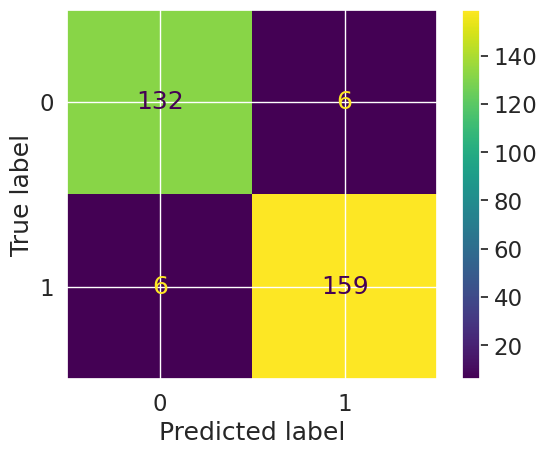

In [30]:
# Make our confusion matrix more visual with sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

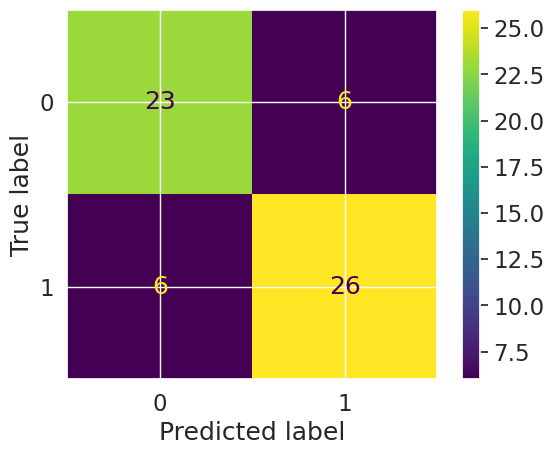

In [31]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_preds
);

## Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

